# Exercício sobre regressão com DNN e dados ruidosos

Treine uma rede neural que se ajuste aos dados fornecidos abaixo.

Use o modelo mais simples possível, mas que se ajuste bem aos dados.


### Nome: Hyago Vieira Lemes Barbosa Silva
### Matrícula: 922

### Importando as bibliotecas

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### Definindo o dataset

In [2]:
# Atributo.
x = np.array([[-1.0000],[-0.9800],[-0.9600],[-0.9400],[-0.9200],[-0.9000],[-0.8800],[-0.8600],[-0.8400],[-0.8200],[-0.8000],[-0.7800],[-0.7600],[-0.7400],[-0.7200],[-0.7000],[-0.6800],[-0.6600],[-0.6400],[-0.6200],[-0.6000],[-0.5800],[-0.5600],[-0.5400],[-0.5200],[-0.5000],[-0.4800],[-0.4600],[-0.4400],[-0.4200],[-0.4000],[-0.3800],[-0.3600],[-0.3400],[-0.3200],[-0.3000],[-0.2800],[-0.2600],[-0.2400],[-0.2200],[-0.2000],[-0.1800],[-0.1600],[-0.1400],[-0.1200],[-0.1000],[-0.0800],[-0.0600],[-0.0400],[-0.0200],[0.0000],[0.0200],[0.0400],[0.0600],[0.0800],[0.1000],[0.1200],[0.1400],[0.1600],[0.1800],[0.2000],[0.2200],[0.2400],[0.2600],[0.2800],[0.3000],[0.3200],[0.3400],[0.3600],[0.3800],[0.4000],[0.4200],[0.4400],[0.4600],[0.4800],[0.5000],[0.5200],[0.5400],[0.5600],[0.5800],[0.6000],[0.6200],[0.6400],[0.6600],[0.6800],[0.7000],[0.7200],[0.7400],[0.7600],[0.7800],[0.8000],[0.8200],[0.8400],[0.8600],[0.8800],[0.9000],[0.9200],[0.9400],[0.9600],[0.9800]])
x = x.reshape((len(x), ))

# Valores esperados (rótulos).
y = np.array([[2.8430],[3.1381],[2.9244],[2.7861],[2.9280],[2.7738],[2.8377],[2.7283],[2.9339],[2.8179],[2.9297],[2.9174],[2.9368],[2.6965],[2.4980],[2.6416],[2.4662],[2.7446],[2.8236],[2.5448],[2.5921],[2.6842],[2.2680],[2.5057],[2.4570],[2.4846],[2.6486],[2.5413],[2.3897],[2.4596],[2.2950],[2.2857],[2.4995],[2.4205],[2.3266],[2.2281],[2.3636],[2.2785],[2.1923],[2.2687],[2.1807],[2.1150],[2.2315],[2.0983],[2.0559],[2.0267],[2.0947],[1.9915],[2.0493],[2.0690],[2.1200],[1.9080],[1.9794],[1.9558],[1.7788],[1.9183],[1.9108],[1.8345],[1.8798],[1.8059],[1.9824],[1.7402],[1.6944],[1.6580],[1.6566],[1.5599],[1.5479],[1.4707],[1.6614],[1.7665],[1.5337],[1.3794],[1.4164],[1.7335],[1.5664],[1.4243],[1.5442],[1.3090],[1.4028],[1.3816],[1.6266],[1.4310],[1.4552],[1.4960],[1.2963],[1.2333],[1.2134],[1.2729],[1.2125],[1.2815],[1.1458],[0.9575],[1.3239],[1.1006],[1.0718],[1.0081],[1.0699],[0.9018],[1.1268],[0.9014]])
y = y.reshape((len(y), ))


print('Quantidade de amostras de x e y respectivamente', len(x), 'amostras de x e', len(y),'amostras de y')

Quantidade de amostras de x e y respectivamente 100 amostras de x e 100 amostras de y


### Plotando o conjunto de dados.

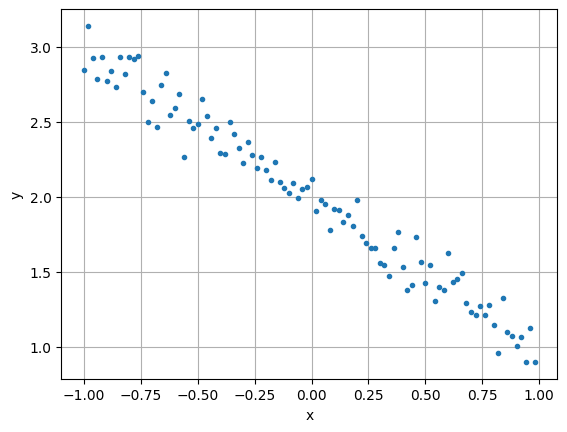

In [3]:
plt.plot(x, y, '.')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

### Definina a rede neural

In [4]:
# Denifindo modelo com 1 neurónio e uma entrada basicamente regressão linear
model = tf.keras.Sequential([tf.keras.layers.Dense(units=1, input_shape=[1])],name='model_1')

### Imprima o resumo da arquitetura do modelo

In [5]:
# resumo do modelo
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Compile o modelo

In [6]:
# Digite o seu código aqui.
# Modificando os detalhes do gradiente descendente estocástico, com os valores feitos com o modelo sem ruído para este com ruído
sgd_modificate = tf.keras.optimizers.experimental.SGD(
    #alterando o passo de aprendizado
    learning_rate=0.02,
    #acelera a descida do gradiente
    momentum=0.01,
    nesterov=False,
    weight_decay=None,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    #usando media móvel exponencial
    use_ema=True,
    #alterando o valore do momento de decaimento
    ema_momentum=0.77,
    ema_overwrite_frequency=None,
    jit_compile=True,
    name='SGD',
)
model.compile(optimizer=sgd_modificate, loss='mean_squared_error',metrics=['mae', 'mse'])

### Treine o modelo

### <font color='orange'> Basicamente podemos verificar como possui ruído, assim tem um limite de erro que será encontrado, e persistirá, pois não terá menor que isto, com isso aproximadamente 100 épocas foi suficiente

In [7]:
# Digite o seu código aqui.
#treinamento o modelo e salvando o hostórico de loss ou mse e mae em 100 épocas apenas
history_novo_modelo = model.fit(x, y, epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 7ms/step - loss: 4.8385 - mae: 1.9210 - mse: 4.8385
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 3.6798 - mae: 1.6357 - mse: 3.6798
Epoch 3/100
4/4 [==============================] - 0s 5ms/step - loss: 2.7404 - mae: 1.3866 - mse: 2.7404
Epoch 4/100
4/4 [==============================] - 0s 5ms/step - loss: 2.1956 - mae: 1.2274 - mse: 2.1956
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 1.7174 - mae: 1.0800 - mse: 1.7174
Epoch 6/100
4/4 [==============================] - 0s 4ms/step - loss: 1.3579 - mae: 0.9525 - mse: 1.3579
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 1.0809 - mae: 0.8461 - mse: 1.0809
Epoch 8/100
4/4 [==============================] - 0s 4ms/step - loss: 0.8712 - mae: 0.7645 - mse: 0.8712
Epoch 9/100
4/4 [==============================] - 0s 5ms/step - loss: 0.7208 - mae: 0.6979 - mse: 0.7208
Epoch 10/100
4/4 [============================

In [8]:
# Salvando o modelo no notebook
model.save('modelo_1_ruido.keras')

### Plote o histórico de erros ao longo das épocas de treinamento

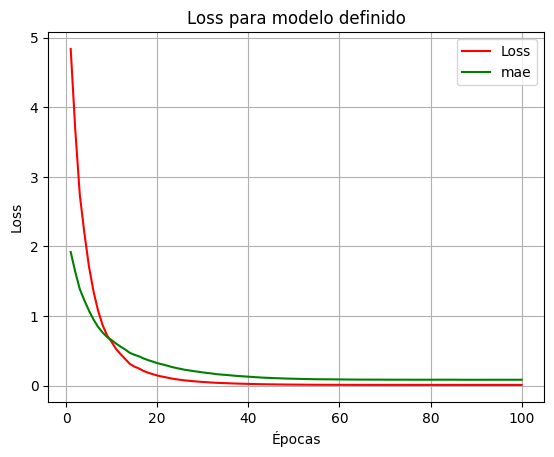


Valor mínimo alcançado de loss do Modelo:

0.011264095082879066


In [29]:
# Digite o seu código aqui.

# Obtendo o valor do loss
loss_novo = history_novo_modelo.history['loss']
mae = history_novo_modelo.history['mae']
#quantidade de epocas
epocas = range(1, len(loss_novo) + 1)

# Plotar as curvas de loss e mae do modelo no mesmo gráfico
plt.plot(epocas, loss_novo, 'r', label='Loss')
plt.plot(epocas, mae, 'g', label='mae')
plt.title('Loss para modelo definido')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

print('\nValor mínimo alcançado de loss do Modelo:\n')
print(np.min(loss_novo))

### Compare os dados ruidosos com as predições feitas pelo modelo.

In [30]:
# Digite o seu código aqui.
print('primeira predição do valor inicial de x = ',model.predict([-1.0]))
print('valor esperado no array quando X = ',x[0],' Y = ',y[0],'\n')

print('segunda predição do valor secundário de x = ',model.predict([-0.98]))
print('valor esperado no array quando X = ',x[1],' Y = ',y[1],'\n')

1/1 [==============================] - 0s 42ms/step
primeira predição do valor inicial de x =  [[2.9790888]]
valor esperado no array quando X =  -1.0  Y =  2.843 

1/1 [==============================] - 0s 45ms/step
segunda predição do valor secundário de x =  [[2.959357]]
valor esperado no array quando X =  -0.98  Y =  3.1381 



In [32]:
print("w = ", model.get_weights()[0][0][0])
print("b  = ", model.get_weights()[1][0])

w =  -0.98658997
b  =  1.9924988


### <font color='orange'> Abaixo gráficamente analisando aproximação da reta estimada com os valores ruidosos. Assim também uma predição de um valor aleatório printado em comparação com os valores da reta estimada

1/1 [==============================] - 0s 82ms/step
terceira predição do valor aleatório que não se encontra nas amostras dadas com X = 0.00212414, Y =  [[1.990403]]

Valor da reta se aproxima de Y = -X + 2, portanto Y =  1.99787586 

Valor com o modelo Y =  -0.98658997  +  1.9924988 portanto Y =  1.9979043447811242 



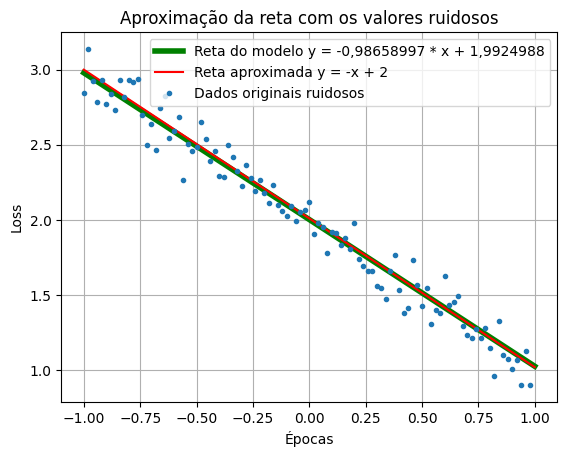

In [41]:
x_aproximado = np.linspace(-1,1,100)
y_aproximado = -x + 2

y_modelo = (model.get_weights()[0][0][0])*x + model.get_weights()[1][0]
print('terceira predição do valor aleatório que não se encontra nas amostras dadas com X = 0.00212414, Y = ', model.predict([0.00212414]))
y_saida_aproximada = -0.00212414+2
print('\nValor da reta se aproxima de Y = -X + 2, portanto Y = ', y_saida_aproximada,'\n')
y_saida_modelo = -0.00212414*0.98658997 +2
print('Valor com o modelo Y = ', model.get_weights()[0][0][0] , ' + ', model.get_weights()[1][0], 'portanto Y = ',y_saida_modelo,'\n')

plt.title('Reta aproximada junto com os dados ruidosos e a reta treinada pelo modelo')
plt.plot(x_aproximado,y_modelo, 'g', label='Reta do modelo y = -0,98658997 * x + 1,9924988', linewidth=4)
plt.plot(x_aproximado,y_aproximado, 'r', label='Reta aproximada y = -x + 2')
plt.plot(x, y,'.', label='Dados originais ruidosos')


plt.title('Aproximação da reta com os valores ruidosos')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()